---
# Analysis of cGenie AMOC Sensibility Experiments
---

**Author:** Amaury Laridon

**Date:** 27/11/2023

---
Three experiments have been perform by Justin Gérard for my Master's Thesis. The goal of those experiment is to produce the bifurcation diagram and to retrieve critical bifurcation coordinates on which I will calibrate my simplified model of the AMOC in the Tipping Cascade Module of the AMOC-GIS that I implement in SURFER. 

In the parameterization B of the fresh water flux the ODE model that encodes the dynamics of the AMOC in my tipping module is the following : 

$$      \frac{d\Psi}{dt} = (-\Psi^3 + a_1\Psi^2 + b_1\Psi + c_1 + d_1 T + e_{12}F_{GIS}+fF_O)\mu_\Psi(\Psi)  = h(\Psi, T, F_{GIS}, F_O) \quad (1)      $$

The goal from the experiments made with cGenie is to retrieve the coordinates,

$$  \left\{(\Psi^+, T^+), (\Psi^-, T^-), (\Psi^+, F_{GIS}^+), (\Psi^-, F_{GIS}^-), (\Psi^+, F_{O}^+), (\Psi^-, F_{O}^-)\right \} $$

The experiments are the following one :

- **ExpA = Bifurcation experiment with a $CO_2$ forcing** and constant freshwater forcing.
    - In our module we force the AMOC with a temperature forcing over 40 000 but spanning $CO_2$ concentration from $280\; ppm$ up to $2800 \; ppm$ and then back to $280\;ppm$. We can find then a relation to convert a forcing in $CO_2$ into a forcing in temperature. 
- **ExpB = Bifurcation experiment with a $F_{GIS}$ forcing** and constant $CO_2$ forcing and constant $F_{O}$ freshwater forcing.
    - Hosing experiment from $-0.2 \; Sv$ to $0.3 \; Sv$ and back to $-0.2 \; Sv$ in $20\,000$ years injected between 50°N and 70°N and 45°W and 5°E with constant salinity over the global ocean.
- **ExpC = Bifurcation experiment with a $F_{O}$ forcing** and constant $COO_2$ forcing and constant $F_{O}$ freshwater forcin
    - Hosing experiment from $-0.2 \; Sv$ to $0.3 \; Sv$ and back to $-0.2 \; Sv$ in $20\,000$ years injected between 20°N and 50°N across the Atlantic with constant salinity over the global ocean.

---


In [164]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from IPython.display import Image
from scipy import interpolate
from scipy.interpolate import interp1d

Loading Data

In [165]:
################################# Personnal data path #####################################

base_path = 'C:\\Users\\AL000111\\Documents\\Mémoire\\Code\\LPHYS2299-Master-s-Thesis\\cGenie Simulations\\jgerard simulations\\cGenie_sim'

personal_data_path_ExpA = os.path.join(base_path,'bifurcation_CO2\\biogem\\')
personal_data_path_ExpB = os.path.join(base_path,'bifurcation_freshwater_flux_50_and_70_N_0.2Sv_sal_cst\\biogem\\')
personal_data_path_ExpC = os.path.join(base_path,'bifurcation_freshwater_flux_0.2Sv_sal_cst\\biogem\\')
save_fig_dir = "C:\\Users\\AL000111\\Documents\\Mémoire\\Code\\LPHYS2299-Master-s-Thesis\\cGenie Simulations\\Figures\\"


# Linux ThinkPad path #
# personal_data_path_ExpA = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/jgerard simulations/bifurcation_CO2/biogem/"
# personal_data_path_ExpB = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/jgerard simulations/bifurcation_freshwater_flux_50_and_70_N_0.2Sv_sal_cst/biogem/"
# personal_data_path_ExpC = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/jgerard simulations/bifurcation_freshwater_flux_0.2Sv_sal_cst/biogem/"
# save_fig_dir = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/Figures/"

###################################### Reading data ######################################

############################# Exp A ##################################

## CO2 Forcing ## 
forcing_CO_2 = pd.read_table(personal_data_path_ExpA+"biogem_series_atm_pCO2_mod.res",header=1,sep=",")
global_pCO2 = forcing_CO_2["0.279984E-03"]
year_ExpA = forcing_CO_2["0.500"]
time_ramp_up_ExpA = year_ExpA[0:499]
time_ramp_down_ExpA = year_ExpA[498:]

## Temperature Forcing ## 
forcing_temp = pd.read_table(personal_data_path_ExpA+"biogem_series_atm_temp.res", header=1, sep=",")
global_sat = forcing_temp["12.268095"]

## Oceanic Temperature ## 

ocn_temp_data_ExpA = pd.read_table(personal_data_path_ExpA+'biogem_series_ocn_temp.res',header=1,sep=',')
ocn_temp_ExpA = ocn_temp_data_ExpA["3.543834"]

## Oceanic Salinity ## 

ocn_sal_data_ExpA = pd.read_table(personal_data_path_ExpA+'biogem_series_ocn_sal.res',header=1,sep=',')
ocn_sal_ExpA = ocn_sal_data_ExpA["34.900916"]

## Global and Atlantic Overturning Circulation ## 

opsi_ExpA = pd.read_table(personal_data_path_ExpA+"biogem_series_misc_opsi.res",header=1,sep=",")
glob_min_overt_ExpA = opsi_ExpA["-35.594"]
glob_max_overt_ExpA = opsi_ExpA["37.735"]
atl_min_overt_ExpA = opsi_ExpA["-0.566"]
atl_max_overt_ExpA = opsi_ExpA["14.398"]

############################# Exp B ##################################

## Oceanic Temperature ## 

ocn_temp_data_ExpB = pd.read_table(personal_data_path_ExpB+'biogem_series_ocn_temp.res',header=1,sep=',')
year_ExpB = ocn_temp_data_ExpB["0.500"]
time_ramp_up_ExpB = year_ExpA[0:451]
time_ramp_down_ExpB = year_ExpA[450:]
ocn_temp_ExpB = ocn_temp_data_ExpB["4.674478"]

## Oceanic Salinity ## 

ocn_sal_data_ExpB = pd.read_table(personal_data_path_ExpB+'biogem_series_ocn_sal.res',header=1,sep=',')
ocn_sal_ExpB = ocn_sal_data_ExpB["34.900942"]

## Temperature response ## 

atm_temp_ExpB = pd.read_table(personal_data_path_ExpB+"biogem_series_atm_temp_mod.res",header=1,sep=',')
global_sat_ExpB = atm_temp_ExpB["12.265689"]

## Global and Atlantic Overturning Circulation ## 

opsi_ExpB = pd.read_table(personal_data_path_ExpB+"biogem_series_misc_opsi.res",header=1,sep=",")
glob_min_overt_ExpB = opsi_ExpB["-35.476"]
glob_max_overt_ExpB = opsi_ExpB["36.925"]
atl_min_overt_ExpB = opsi_ExpB["-0.191"]
atl_max_overt_ExpB = opsi_ExpB["21.615"]


############################# Exp C ##################################

## Oceanic Temperature ## 

ocn_temp_data_ExpC = pd.read_table(personal_data_path_ExpC+'biogem_series_ocn_temp.res',header=1,sep=',')
year_ExpC = ocn_temp_data_ExpC["0.500"]
ocn_temp_ExpC = ocn_temp_data_ExpC["4.897130"]


## Oceanic Salinity ## 

ocn_sal_data_ExpC = pd.read_table(personal_data_path_ExpC+'biogem_series_ocn_sal.res',header=1,sep=',')
ocn_sal_ExpC = ocn_sal_data_ExpC["34.900919"]


## Temperature response ## 

atm_temp_ExpC = pd.read_table(personal_data_path_ExpC+"biogem_series_atm_temp.res",header=1,sep=',')
global_sat_ExpC = atm_temp_ExpC["12.269550"]


## Global and Atlantic Overturning Circulation ## 

opsi_ExpC = pd.read_table(personal_data_path_ExpC+"biogem_series_misc_opsi.res",header=1,sep=",")
glob_min_overt_ExpC = opsi_ExpC["-35.220"]
glob_max_overt_ExpC = opsi_ExpC["37.422"]
atl_min_overt_ExpC = opsi_ExpC["-0.452"]
atl_max_overt_ExpC = opsi_ExpC["19.296"]


## Output ## 

#print(atm_temp_ExpB)"""

---
## ExpA - $CO_2$ Sensibility Experiment
---

### Time series of the forcing

#### $CO_2$ forcing


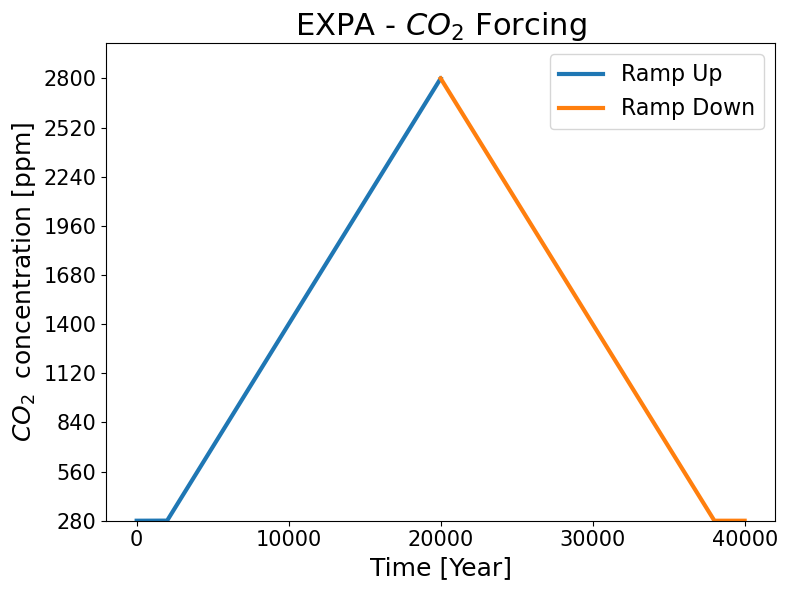

In [166]:
# print(np.shape(global_pCO2))
# print(round(539/2))

### Forcing parameterization ###

t_pi= 0
t_0 = 2000
t_half = 20000
t_f = 38000
t_end = 40000
co2_min = 280
co2_max = 2800

time_pre_ramp_up = np.arange(t_pi,t_0,1)
time_ramp_up = np.arange(t_0,t_half,1)
time_ramp_up_total = np.arange(t_pi,t_half,1)
time_ramp_down = np.arange(t_half,t_f,1)
time_post_ramp_down = np.arange(t_f,t_end,1)
time_ramp_down_total = np.arange(t_half,t_end,1)
time = np.arange(t_0,t_f,1)

eq_pre_ramp_up = interpolate.interp1d([t_pi,t_0],[co2_min,co2_min],bounds_error= False, fill_value=0)
eq_pre_ramp_up_forcing = eq_pre_ramp_up(time_pre_ramp_up)

co2_ramp_up = interpolate.interp1d([t_0,t_half],[co2_min,co2_max],bounds_error= False, fill_value=0)
co2_ramp_up_forcing = co2_ramp_up(time_ramp_up)

co2_ramp_up_total_forcing = np.concatenate((eq_pre_ramp_up_forcing,co2_ramp_up_forcing))

co2_ramp_down = interpolate.interp1d([t_half,t_f],[co2_max,co2_min],bounds_error= False, fill_value=0)
co2_ramp_down_forcing = co2_ramp_down(time_ramp_down)

eq_post_ramp_down = interpolate.interp1d([t_f,t_end],[co2_min,co2_min],bounds_error= False, fill_value=0)
eq_post_ramp_down_forcing = eq_post_ramp_down(time_post_ramp_down)

co2_ramp_down_total_forcing = np.concatenate((co2_ramp_down_forcing,eq_post_ramp_down_forcing))

# co2_forcing = np.concatenate((frswat_flux_ramp_up,frswat_flux_ramp_down))
# print(np.shape(co2_ramp_up_forcing))
# print(np.shape(co2_ramp_down_forcing))
# print(np.shape(co2_forcing))

### Plot ###

plt.figure(figsize=(8,6))
plt.plot(time_ramp_up_total,co2_ramp_up_total_forcing,label='Ramp Up',lw=3)
plt.plot(time_ramp_down_total,co2_ramp_down_total_forcing,label='Ramp Down',lw=3)
#plt.plot(year_ExpA, global_pCO2*1e6)
plt.title("EXPA - " + r"$CO_{2}$"+" Forcing",fontsize=22)
plt.xlabel("Time [Year]",fontsize=18)
plt.ylabel(r"$CO_2\;$ concentration [ppm]",fontsize=18)
plt.ylim(280,3000)
plt.yticks(np.arange(280, 3000, step=280))
plt.xticks(np.arange(0,50000, step=10000))
plt.tick_params(axis='both',labelsize=15)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig(save_fig_dir+'EXPA\\EXPA_CO2_forcing',dpi=500)
# Linux ThinkPad path #
#plt.savefig(save_fig_dir+'/EXPA/EXPA_CO2_forcing',dpi=500)
plt.show()

#### Temperature forcing

In [167]:
### Computation of the global surface temperature anomaly ###
eq_temp_cGenie = global_sat[0]
global_sat_anomaly_cGenie = global_sat - eq_temp_cGenie
print("Equilibrium initial surface temperature : {} °C".format(eq_temp_cGenie))

## Ramp Up temperature anomaly ##
ramp_up_temp_anom = global_sat_anomaly_cGenie[0:499]

## Ramp Down temperature anomaly ##
ramp_down_temp_anom = global_sat_anomaly_cGenie[498:]

Equilibrium initial surface temperature : 12.26731 °C


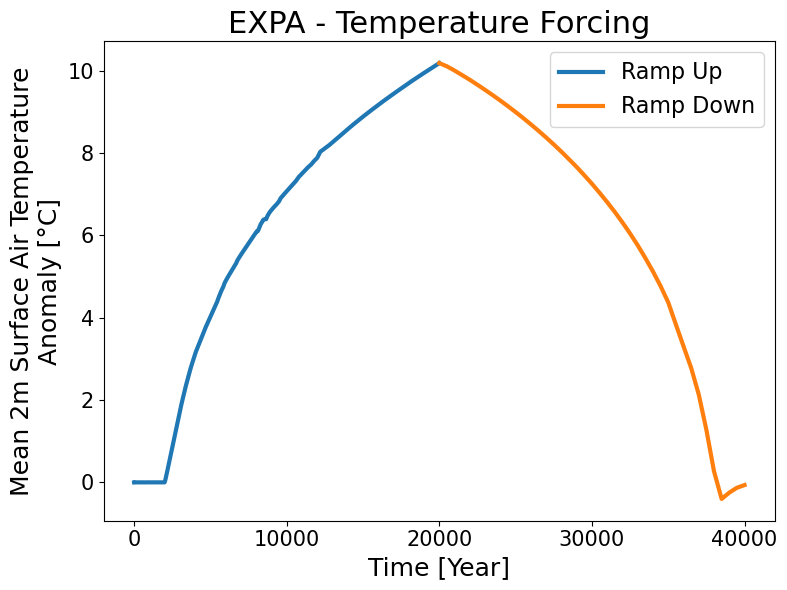

In [168]:
plt.figure(figsize=(8,6))
plt.plot(time_ramp_up_ExpA,ramp_up_temp_anom,label='Ramp Up',lw=3)
plt.plot(time_ramp_down_ExpA, ramp_down_temp_anom,label='Ramp Down',lw=3)
plt.title("EXPA - Temperature Forcing",fontsize=22)
plt.xlabel("Time [Year]",fontsize=18)
plt.ylabel("Mean 2m Surface Air Temperature\nAnomaly [°C]",fontsize=18)
plt.xticks(np.arange(0,50000, step=10000))
plt.tick_params(axis='both',labelsize=15)
plt.tight_layout()
plt.savefig(save_fig_dir+'EXPA\\EXPA_Temp_forcing_anomaly',dpi=500)
# Linux ThinkPad path #
#plt.savefig(save_fig_dir+'/EXPA/EXPA_Temp_forcing_anomaly',dpi=500)
plt.legend(fontsize=16)
plt.show()

### Data Analysis

#### Global oceanic temperature and salinity

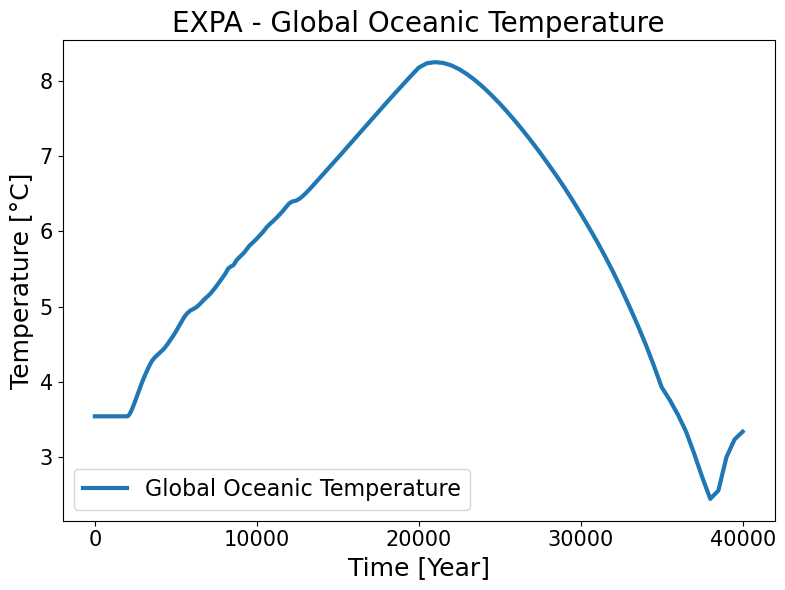

In [169]:
fig, ax1 = plt.subplots(figsize=(8,6))

ax1.plot(year_ExpA, ocn_temp_ExpA,label='Global Oceanic Temperature',color="tab:blue",lw=3)
ax1.set_xlabel("Time [Year]",fontsize=18)
ax1.set_ylabel("Temperature [°C]",fontsize=18)
plt.legend(fontsize=16)
plt.tick_params(axis='both',labelsize=15)


#ax2 = ax1.twinx()

#ax2.plot(year_ExpA, ocn_sal_ExpA,label='Global Oceanic Salinity',color="tab:orange",lw=3)
#ax2.set_ylabel("Salinity [PSU]",fontsize=18)

plt.tick_params(axis='both',labelsize=15)

plt.title("EXPA - Global Oceanic Temperature",fontsize=20)
plt.legend(fontsize=16)
plt.xticks(np.arange(0,50000, step=10000))
plt.tight_layout()
plt.savefig(save_fig_dir+'EXPA\\EXPA_Glob_Temp',dpi=500)
# Linux ThinkPad path #
#plt.savefig(save_fig_dir+'/EXPA/EXPA_Glob_Temp',dpi=500)
plt.show()

#### Global Min/Max Overtuning Stream-Functions Values

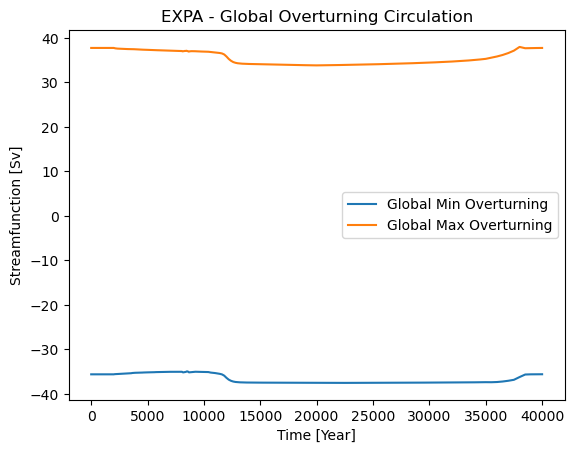

In [170]:
plt.plot(year_ExpA, glob_min_overt_ExpA,label='Global Min Overturning')
plt.plot(year_ExpA, glob_max_overt_ExpA,label='Global Max Overturning')
plt.title("EXPA - Global Overturning Circulation")
plt.xlabel("Time [Year]")
plt.ylabel("Streamfunction [Sv]")
plt.legend()
plt.savefig(save_fig_dir+'EXPA\\EXPA_Glob_Overt_Circ_MinMax')
# Linux ThinkPad path #
#plt.savefig(save_fig_dir+'/EXPA/EXPA_Glob_Overt_Circ_MinMax')
plt.show()

#### Global Min/Max Overtuning Atlantic Overturning circulation

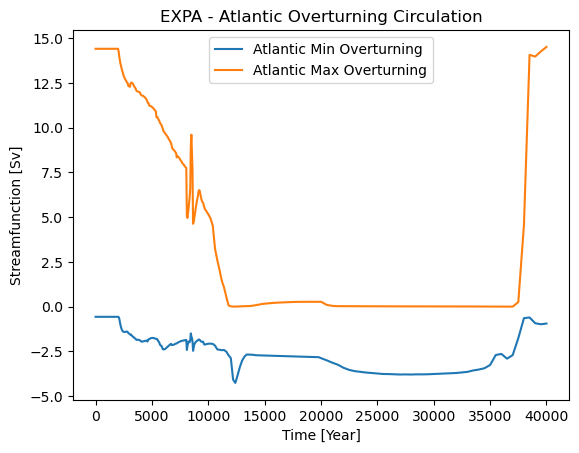

In [171]:
plt.plot(year_ExpA, atl_min_overt_ExpA,label='Atlantic Min Overturning')
plt.plot(year_ExpA, atl_max_overt_ExpA,label='Atlantic Max Overturning')
plt.title("EXPA - Atlantic Overturning Circulation")
plt.xlabel("Time [Year]")
plt.ylabel("Streamfunction [Sv]")
plt.legend()
plt.savefig(save_fig_dir+'/EXPA/EXPA_Atl_Overt_Circ_MinMax')
plt.show()

#### Bifurcation Diagram

C:\Users\AL000111\AppData\Local\Temp\ipykernel_20068\1080066380.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


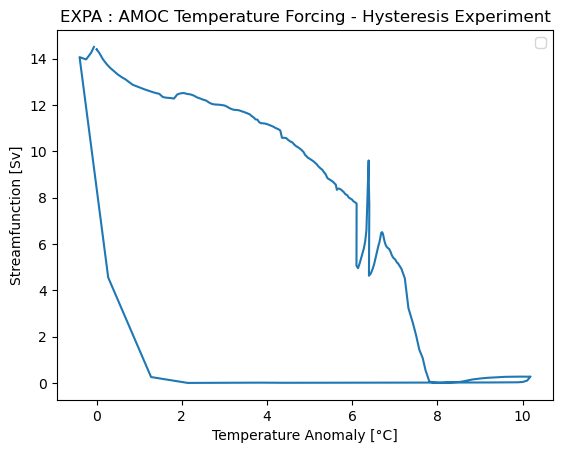

In [172]:
plt.plot(global_sat_anomaly_cGenie, atl_max_overt_ExpA)
plt.title("EXPA : AMOC Temperature Forcing - Hysteresis Experiment")
plt.xlabel("Temperature Anomaly [°C]")
plt.ylabel("Streamfunction [Sv]")
plt.legend()
plt.savefig(save_fig_dir+'EXPA\\EXPA_bif_diag')
# Linux ThinkPad path #
#plt.savefig(save_fig_dir+'/EXPA/EXPA_bif_diag')
plt.show()

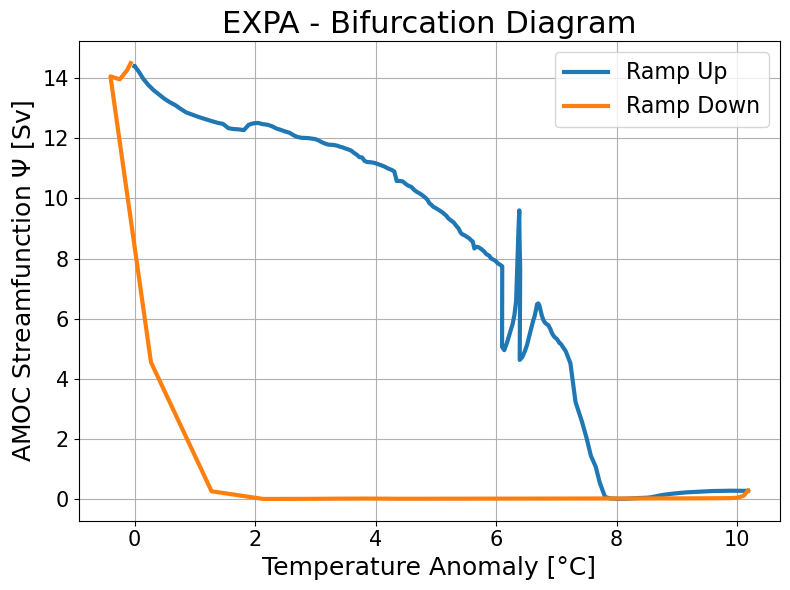

In [173]:
plt.figure(figsize=(8,6))
plt.plot(global_sat_anomaly_cGenie[0:499], atl_max_overt_ExpA[0:499],label='Ramp Up',lw=3)
plt.plot(global_sat_anomaly_cGenie[498:], atl_max_overt_ExpA[498:],label='Ramp Down',lw=3)
plt.title("EXPA - Bifurcation Diagram",fontsize=22)
plt.xlabel("Temperature Anomaly [°C]",fontsize=18)
plt.ylabel("AMOC Streamfunction " + r'$\Psi$ ' + "[Sv]",fontsize=18)
plt.legend(fontsize=16)
plt.tick_params(axis='both',labelsize=15)
plt.tight_layout()
plt.grid()
plt.savefig(save_fig_dir+'/EXPA/EXPA_bif_diag_v2',dpi=400)
plt.show()

Now we have to answer to question, how to chose the critical bifurcation coordinates from this graph ? 

---
## ExpB - $F_{GIS}$ Sensibility Experiment
---

### Forcing Analysis

I can manualy reconstruct the hosing forcing which is the same in sensibility experiment B and C the only difference is related to the location where the hosing is apply. Justin Gérard's experimental protocol shares the following parameterization

(10000,)
(10000,)
(20000,)


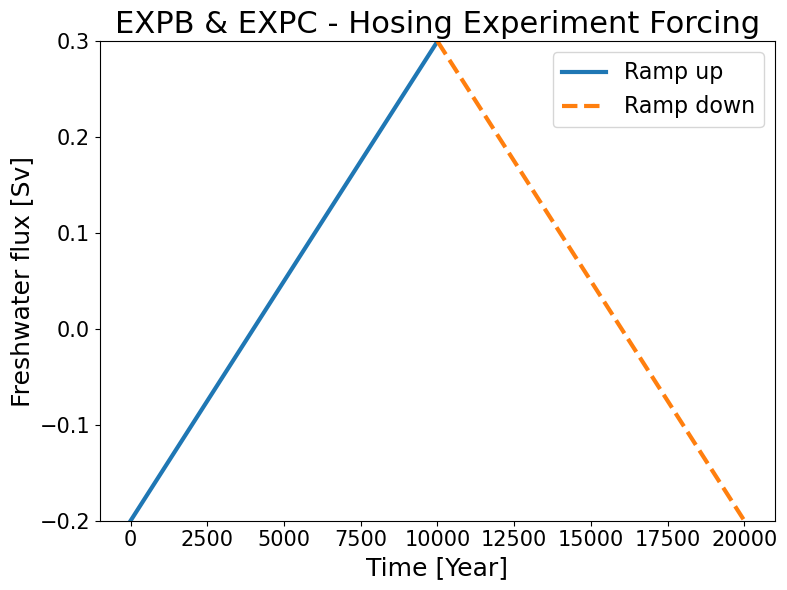

In [174]:
### Construction of the Hosing Profile ###
t_0 = 0
t_half = 10000
t_f = 20000
hosing_min = -0.2
hosing_max = 0.3

time_ramp_up = np.arange(t_0,t_half,1)
time_ramp_down = np.arange(t_half,t_f,1)
time = np.arange(t_0,t_f,1)

freshwater_flux_ramp_up_hosing = interpolate.interp1d([t_0,t_half],[hosing_min,hosing_max],bounds_error= False, fill_value=0)
frswat_flux_ramp_up = freshwater_flux_ramp_up_hosing(time_ramp_up)

freshwater_flux_ramp_down_hosing = interpolate.interp1d([t_half,t_f],[hosing_max,hosing_min],bounds_error= False, fill_value=0)
frswat_flux_ramp_down = freshwater_flux_ramp_down_hosing(time_ramp_down)

hosing_forcing = np.concatenate((frswat_flux_ramp_up,frswat_flux_ramp_down))
print(np.shape(frswat_flux_ramp_down))
print(np.shape(frswat_flux_ramp_up))
print(np.shape(hosing_forcing))
### Plotting ### 

#plt.plot(time, hosing_forcing,color='red')
plt.figure(figsize=(8,6))
plt.plot(time_ramp_up,frswat_flux_ramp_up, label='Ramp up',lw=3)
plt.plot(time_ramp_down,frswat_flux_ramp_down,'--',label='Ramp down',lw=3)
plt.title("EXPB & EXPC - Hosing Experiment Forcing",fontsize=22)
plt.xlabel("Time [Year]",fontsize=18)
plt.ylabel("Freshwater flux [Sv]",fontsize=18)
plt.ylim(-0.2,0.3)
plt.legend(fontsize=16)
plt.tick_params(axis='both',labelsize=15)
plt.tight_layout()
#plt.yticks(np.arange(280, 3000, step=280))
plt.savefig(save_fig_dir+'EXPB\\EXPB_F_forcing',dpi=400)
plt.savefig(save_fig_dir+'EXPC\\EXPC_F_forcing',dpi=400)
# Linux ThinkPad path #
#plt.savefig(save_fig_dir+'/EXPB/EXPB_F_forcing',dpi=400)
#plt.savefig(save_fig_dir+'/EXPC/EXPC_F_forcing',dpi=400)
plt.show()

### Data Analysis

#### Global oceanic temperature and salinity

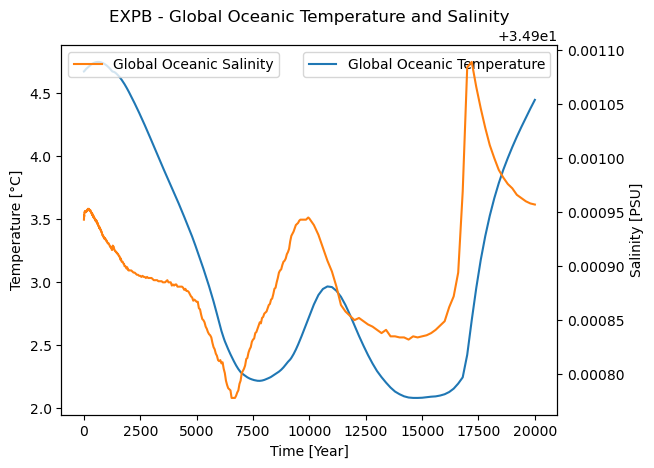

In [175]:
fig, ax1 = plt.subplots()

ax1.plot(year_ExpB, ocn_temp_ExpB,label='Global Oceanic Temperature',color="tab:blue")
ax1.set_xlabel("Time [Year]")
ax1.set_ylabel("Temperature [°C]")
plt.legend()


ax2 = ax1.twinx()

ax2.plot(year_ExpB, ocn_sal_ExpB,label='Global Oceanic Salinity',color="tab:orange")
ax2.set_ylabel("Salinity [PSU]")


plt.title("EXPB - Global Oceanic Temperature and Salinity")
plt.legend()
plt.savefig(save_fig_dir+'EXPB\\EXPB_Glob_Temp_and_Sal')
# Linux ThinkPad path #
plt.savefig(save_fig_dir+'/EXPB/EXPB_Glob_Temp_and_Sal')
plt.show()

#### Global Min/Max Overtuning Stream-Functions Values

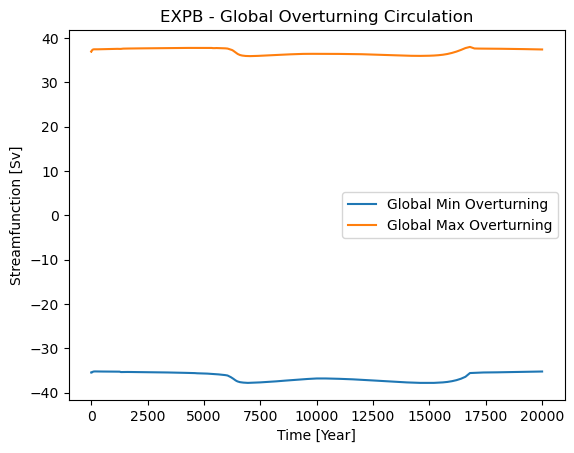

In [176]:
plt.plot(year_ExpB, glob_min_overt_ExpB,label='Global Min Overturning')
plt.plot(year_ExpB, glob_max_overt_ExpB,label='Global Max Overturning')
plt.title("EXPB - Global Overturning Circulation")
plt.xlabel("Time [Year]")
plt.ylabel("Streamfunction [Sv]")
plt.legend()
plt.savefig(save_fig_dir+'/EXPB/EXPB_Glob_Overt_Circ_MinMax')
plt.show()

#### Global Min/Max Overtuning Atlantic Overturning circulation

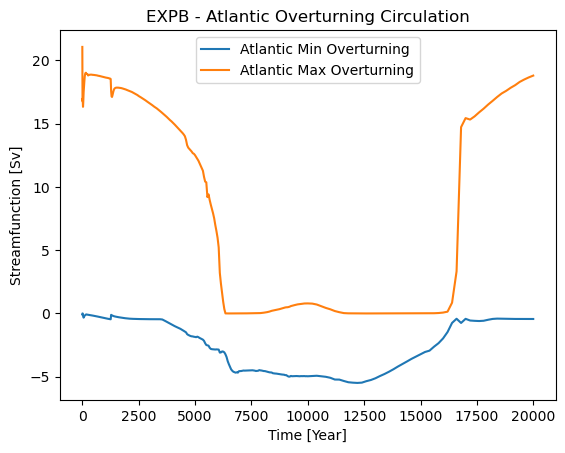

In [177]:
plt.plot(year_ExpB, atl_min_overt_ExpB,label='Atlantic Min Overturning')
plt.plot(year_ExpB, atl_max_overt_ExpB,label='Atlantic Max Overturning')
plt.title("EXPB - Atlantic Overturning Circulation")
plt.xlabel("Time [Year]")
plt.ylabel("Streamfunction [Sv]")
plt.legend()
plt.savefig(save_fig_dir+'/EXPB/EXPB_Atl_Overt_Circ_MinMax')
plt.show()

#### Bifurcation Diagram

C:\Users\AL000111\AppData\Local\Temp\ipykernel_20068\3980726004.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


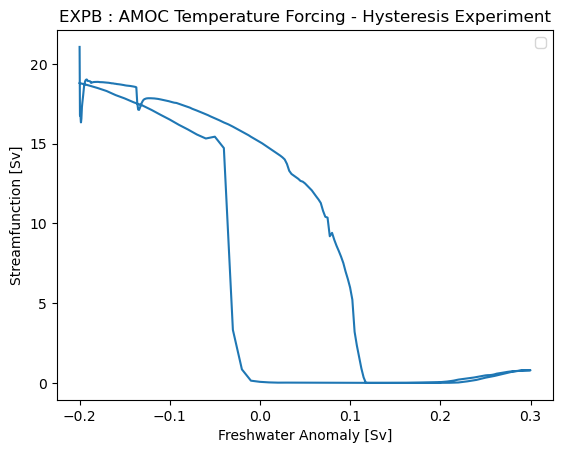

In [178]:
### Hosing Forcing Interpolation ###
hosing_forcing_it = np.interp(year_ExpB, np.arange(t_0,t_f,1), hosing_forcing)

### Plot ### 
plt.plot(hosing_forcing_it,atl_max_overt_ExpB)
plt.title("EXPB : AMOC Temperature Forcing - Hysteresis Experiment")
plt.xlabel("Freshwater Anomaly [Sv]")
plt.ylabel("Streamfunction [Sv]")
plt.legend()
plt.savefig(save_fig_dir+'/EXPB/EXPB_bif_diag')
plt.show()

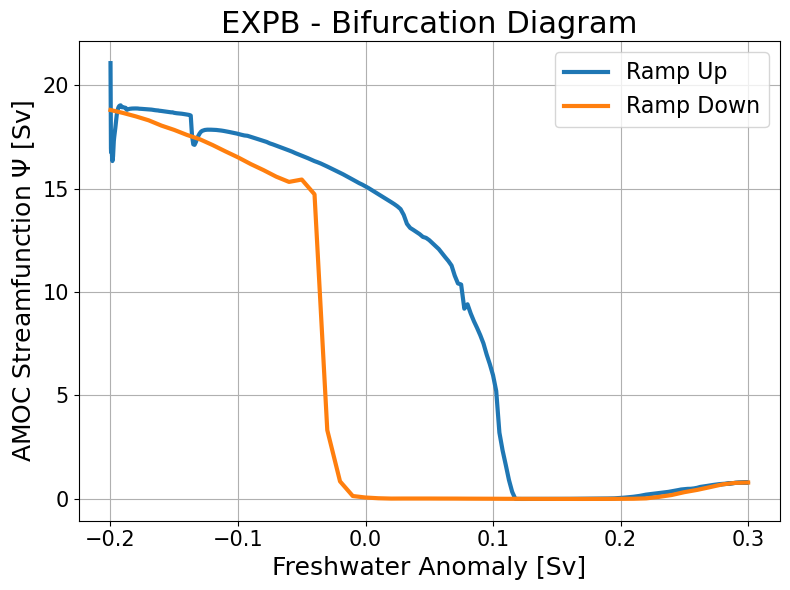

In [179]:
plt.figure(figsize=(8,6))
plt.plot(hosing_forcing_it[0:451],atl_max_overt_ExpB[0:451],label='Ramp Up',lw=3)
plt.plot(hosing_forcing_it[448:],atl_max_overt_ExpB[448:],label='Ramp Down',lw=3)
plt.title("EXPB - Bifurcation Diagram",fontsize=22)
plt.xlabel("Freshwater Anomaly [Sv]",fontsize=18)
plt.ylabel("AMOC Streamfunction " + r'$\Psi$ ' + "[Sv]",fontsize=18)
plt.legend(fontsize=16)
plt.tick_params(axis='both',labelsize=15)
plt.tight_layout()
plt.grid()
plt.savefig(save_fig_dir+'/EXPB/EXPB_bif_diag_v2',dpi=400)
plt.show()

---
## ExpC - $F_{O}$ Sensibility Experiment
---
### Forcing Analysis

This is exactly the same forcing parameterization that the one for ExpB except the difference in location where it is apply

### Data Analysis
#### Global oceanic temperature and salinity

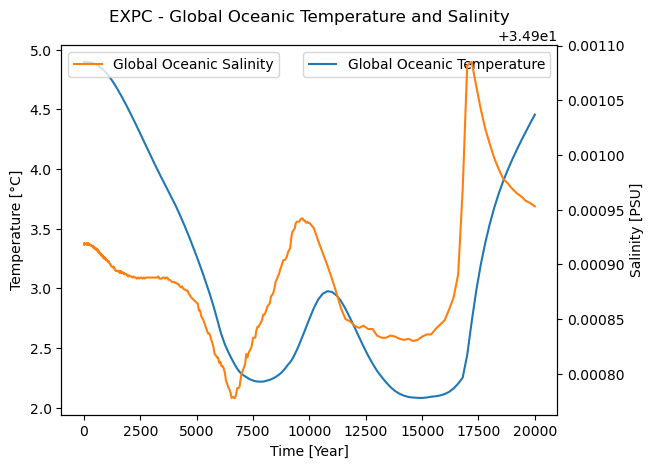

In [180]:
fig, ax1 = plt.subplots()

ax1.plot(year_ExpC, ocn_temp_ExpC,label='Global Oceanic Temperature',color="tab:blue")
ax1.set_xlabel("Time [Year]")
ax1.set_ylabel("Temperature [°C]")
plt.legend()


ax2 = ax1.twinx()

ax2.plot(year_ExpC, ocn_sal_ExpC,label='Global Oceanic Salinity',color="tab:orange")
ax2.set_ylabel("Salinity [PSU]")


plt.title("EXPC - Global Oceanic Temperature and Salinity")
plt.legend()
plt.savefig(save_fig_dir+'/EXPC/EXPC_Glob_Temp_and_Sal')
plt.show()

#### Global Min/Max Overtuning Stream-Functions Values

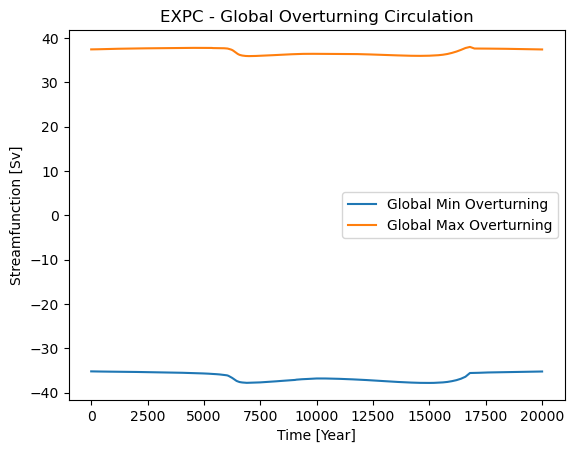

In [181]:
plt.plot(year_ExpC, glob_min_overt_ExpC,label='Global Min Overturning')
plt.plot(year_ExpC, glob_max_overt_ExpC,label='Global Max Overturning')
plt.title("EXPC - Global Overturning Circulation")
plt.xlabel("Time [Year]")
plt.ylabel("Streamfunction [Sv]")
plt.legend()
plt.savefig(save_fig_dir+'/EXPC/EXPC_Glob_Overt_Circ_MinMax')
plt.show()

#### Global Min/Max Overtuning Atlantic Overturning circulation

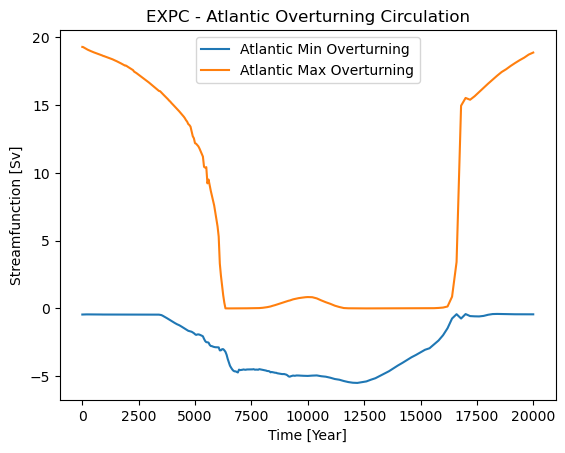

In [182]:
plt.plot(year_ExpC, atl_min_overt_ExpC,label='Atlantic Min Overturning')
plt.plot(year_ExpC, atl_max_overt_ExpC,label='Atlantic Max Overturning')
plt.title("EXPC - Atlantic Overturning Circulation")
plt.xlabel("Time [Year]")
plt.ylabel("Streamfunction [Sv]")
plt.legend()
plt.savefig(save_fig_dir+'/EXPC/EXPC_Atl_Overt_Circ_MinMax')
plt.show()

#### Bifurcation Diagram

C:\Users\AL000111\AppData\Local\Temp\ipykernel_20068\1170074406.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


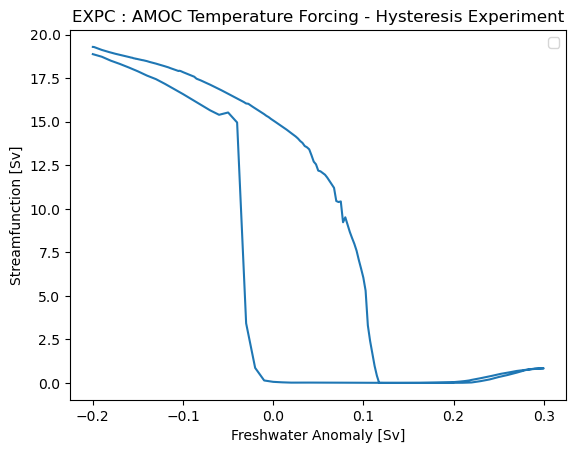

In [183]:
### Hosing Forcing Interpolation ###
hosing_forcing_it = np.interp(year_ExpB, np.arange(t_0,t_f,1), hosing_forcing)

### Plot ###
plt.plot(hosing_forcing_it,atl_max_overt_ExpC)
plt.title("EXPC : AMOC Temperature Forcing - Hysteresis Experiment")
plt.xlabel("Freshwater Anomaly [Sv]")
plt.ylabel("Streamfunction [Sv]")
plt.legend()
plt.savefig(save_fig_dir+'/EXPC/EXPC_bif_diag')
plt.show()

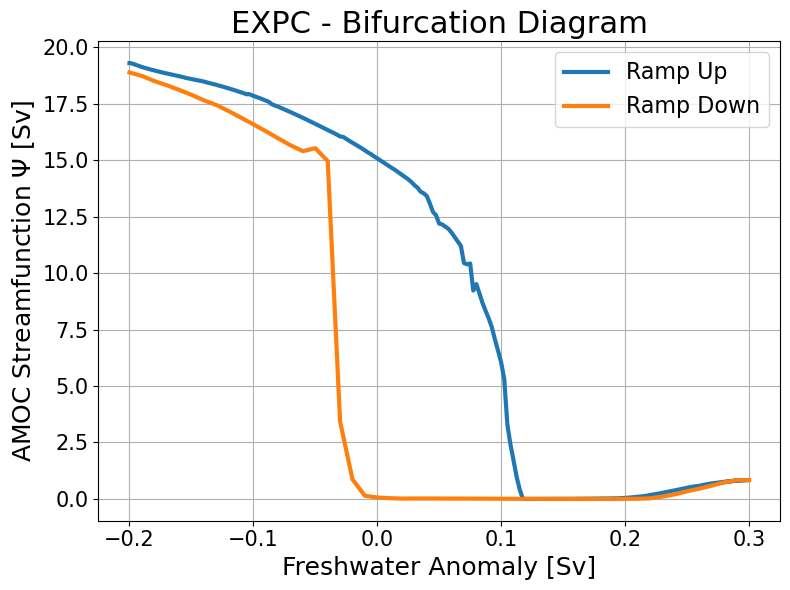

In [184]:
plt.figure(figsize=(8,6))
plt.plot(hosing_forcing_it[0:451],atl_max_overt_ExpC[0:451],label='Ramp Up',lw=3)
plt.plot(hosing_forcing_it[448:],atl_max_overt_ExpC[448:],label='Ramp Down',lw=3)
plt.title("EXPC - Bifurcation Diagram",fontsize=22)
plt.xlabel("Freshwater Anomaly [Sv]",fontsize=18)
plt.ylabel("AMOC Streamfunction " + r'$\Psi$ ' + "[Sv]",fontsize=18)
plt.legend(fontsize=16)
plt.grid()
plt.tick_params(axis='both',labelsize=15)
plt.savefig(save_fig_dir+'/EXPC/EXPC_bif_diag_v2',dpi=300)
plt.tight_layout()
plt.show()

---
# Analysis of the Freshwater Forcings 
---

In [185]:
### Personnal data path ###

personal_data_path_FwfA = personal_data_path_ExpC
personal_data_path_FwfB = personal_data_path_ExpB

# Linux ThinkPad path #
# personal_data_path_FwfA = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/jgerard simulations/freshwater_flux_0.2Sv_sal_cst/biogem/"
# personal_data_path_FwfB = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/jgerard simulations/freshwater_flux_50_and_70_N_0.2Sv_sal_cst/biogem/"

##### Reading data #####

### FwfA ###

## Temperature ## 
FwfA_temp = pd.read_table(personal_data_path_FwfA+"biogem_series_atm_temp.res", header=1, sep=",")
#global_sat = forcing_temp[]

## Global and Atlantic Overturning Circulation ## 

# opsi_ExpA = pd.read_table(personal_data_path_ExpA+"biogem_series_misc_opsi.res",header=1,sep=",")
# glob_min_overt_ExpA = opsi_ExpA["-35.594"]
# glob_max_overt_ExpA = opsi_ExpA["37.735"]
# atl_min_overt_ExpA = opsi_ExpA["-0.566"]
# atl_max_overt_ExpA = opsi_ExpA["14.398"]

### FwfB ###


print(FwfA_temp)


       0.500  12.269550
0        1.5  12.269645
1        2.5  12.269596
2        3.5  12.269756
3        4.5  12.269389
4        5.5  12.269507
..       ...        ...
494  19199.5  12.131472
495  19399.5  12.138393
496  19599.5  12.143215
497  19799.5  12.147765
498  19999.5  12.157989

[499 rows x 2 columns]


---
## A - Freshwater flux 0.2 Sv
---

---
## B - Freshwater flux 0.2 Sv between 50°N and 70°N and 45°W and 5°E
---